In [19]:
import torch.nn
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

# Loading data

In [20]:
#Parameters for linear regresion function

weight = 0.7
bias = 0.3

#Parameter for creating dataset

start = 0
end = 1
step = 0.02

In [21]:
#Create data
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [22]:
# Random split of data for training and testing
from torch.utils.data import TensorDataset, DataLoader

train_size = int(0.8 * len(X)) 
test_size = len(X) - train_size 

dataset = TensorDataset(X, y)
shuffle_loader = DataLoader(dataset, batch_size=len(X), shuffle=True)

X_shuffled, y_shuffled = next(iter(shuffle_loader))

X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]


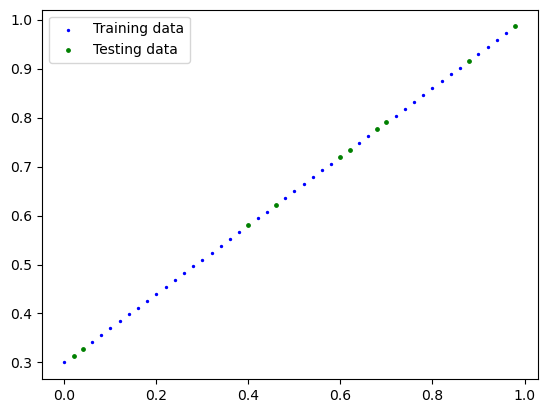

In [23]:
import utils
utils.plot_predictions(X_train, y_train, X_test, y_test)

In [24]:
# building linear regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x +self.bias


In [25]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.5185])), ('bias', tensor([-0.9243]))])

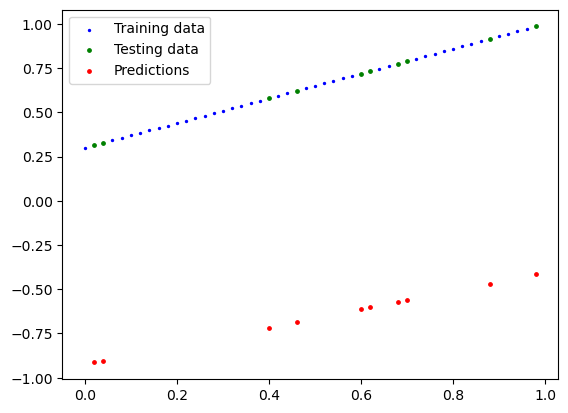

In [26]:
#testing predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)
    
utils.plot_predictions(X_train, y_train, X_test, y_test, y_preds)